In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
k25=6
E=42000
R=8.314
T=25+273
ko=k25/(np.exp(-E/R/T))

In [4]:
k22=ko*np.exp(-E/R/(273+22))
k=k22

In [5]:
To=22
Cao=0.02 #NaoH
Cbo=0.04
Vs=0.15
Vo=0.07

In [6]:
Q=0.01 #L/min
t1=(0.15-Vo)/Q  #min
t1

7.999999999999998

In [7]:
def molbal(t,C):
    
    
    if t <= t1:
        Qout=0
       
    else:
        Qout=Q
    
        
    Ca,Cb,V = C[0],C[1],C[2]
    
    dcadt=Q/V*(Cao)- (Qout/V)*Ca -k*Ca*Cb
    dcbdt=Q/V*(Cbo)- (Qout/V)*Cb -k*Ca*Cb
    
    if t <= t1:
        dVdt=Q
       
    else:
        dVdt=0
      
  
    return [dcadt,
            dcbdt,
            dVdt]

In [8]:
Co=[0,0,Vo] 


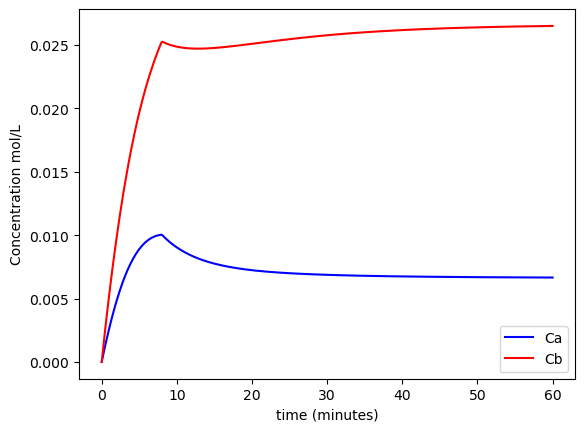

In [9]:
tf=60
tspan=np.linspace(0,tf,500)            
tper = (0,tf)                          
Ci = solve_ivp(molbal, tper, Co, dense_output = True, method = "LSODA")    
Ca,Cb,V = Ci.sol(tspan)

plt.figure(1)
plt.plot(tspan, Ca, color='blue', label='Ca')
plt.plot(tspan, Cb, color='red', label='Cb')
#plt.plot(tspan, V, color='red', label='V')
plt.legend(loc='best')
plt.ylabel('Concentration mol/L') 
plt.xlabel('time (minutes)') 
plt.show() 

In [10]:
Co=[Ca[-1],Cb[-1],0,0]
Q2=0.02

In [11]:
def molbal2 (t,C):
    
    
    Ca1,Cb1,Ca2,Cb2 = C[0],C[1],C[2],C[3]
    
    dca1dt=Q2/Vs*(Cao-Ca1)-k*Ca1*Cb1
    dcb1dt=Q2/Vs*(Cbo-Cb1)-k*Ca1*Cb1
    dca2dt=Q2/Vs*(Ca1-Ca2)-k*Ca2*Cb2
    dcb2dt=Q2/Vs*(Cb1-Cb2)-k*Ca2*Cb2
  

  
    return [dca1dt,
            dcb1dt,
            dca2dt,
            dcb2dt]

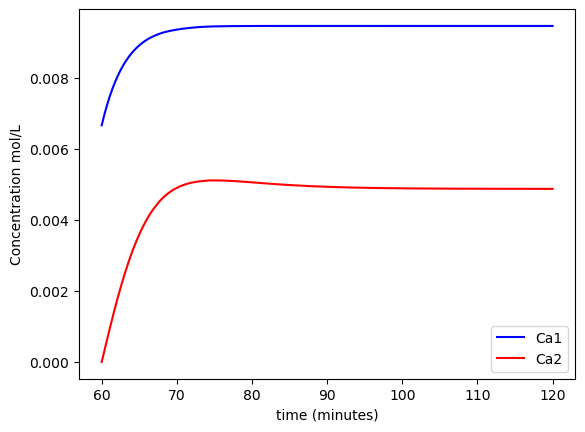

In [12]:
tf2=120
tspan2=np.linspace(tf,tf2,500)            
tper2 = (tf,tf2)                          
Ci = solve_ivp(molbal2, tper2, Co, dense_output = True, method = "LSODA")    
Ca1,Cb1,Ca2,Cb2 = Ci.sol(tspan2)

plt.figure(1)
plt.plot(tspan2, Ca1, color='blue', label='Ca1')
plt.plot(tspan2, Ca2, color='red', label='Ca2')
plt.legend(loc='best')
plt.ylabel('Concentration mol/L') 
plt.xlabel('time (minutes)') 
plt.show() 

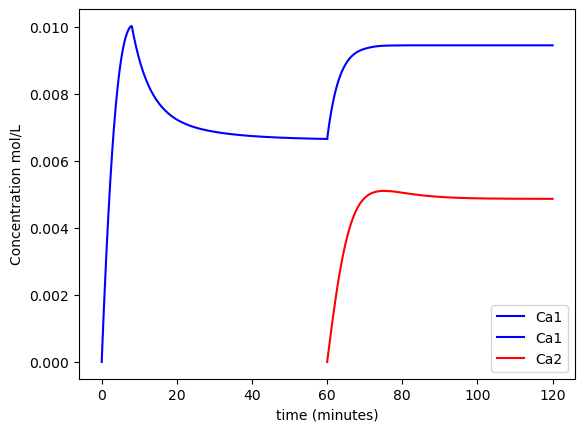

In [13]:
plt.figure(1)
plt.plot(tspan2, Ca1,tspan, Ca,color='blue', label='Ca1')
#plt.plot(tspan2, Cb1, tspan, Cb,color='red', label='Ca2')
plt.plot(tspan2, Ca2, color='red', label='Ca2')
plt.legend(loc='best')
plt.ylabel('Concentration mol/L') 
plt.xlabel('time (minutes)') 
plt.show() 